In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
import re
%matplotlib inline

In [85]:
d1 = pd.read_csv('uber-raw-data-apr14.csv')
d2 = pd.read_csv('uber-raw-data-may14.csv')
d3 = pd.read_csv('uber-raw-data-jun14.csv')
d4 = pd.read_csv('uber-raw-data-jul14.csv')
d5 = pd.read_csv('uber-raw-data-aug14.csv')
d6 = pd.read_csv('uber-raw-data-sep14.csv')

In [86]:
len(d1)+len(d2)+len(d3)+len(d4)+len(d5)+len(d6)

4534327

In [87]:
d7 = pd.concat([d1,d2,d3,d4,d5,d6], axis = 0, ignore_index = True, sort = False)
len(d7)
d7.Base.value_counts()

B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: Base, dtype: int64

In [88]:
d7

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [89]:
a = date.today()
a.day
d7['Date/Time'].describe()

count               4534327
unique               260093
top       4/7/2014 20:21:00
freq                     97
Name: Date/Time, dtype: object

In [90]:
d7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [91]:
d7['Date/Time'] = pd.to_datetime(d7['Date/Time'])

In [92]:
d7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 138.4+ MB


In [93]:
d7['Date/Time'].dt.time

0          00:11:00
1          00:17:00
2          00:21:00
3          00:28:00
4          00:33:00
             ...   
4534322    22:57:00
4534323    22:57:00
4534324    22:58:00
4534325    22:58:00
4534326    22:58:00
Name: Date/Time, Length: 4534327, dtype: object

In [94]:
# def add_datepart(df, fldname, drop=True):
#     fld = df[fldname]
#     if not np.issubdtype(fld.dtype, np.datetime64):
#         df[fldname] = fld = pd.to_datetime(fld, 
#                                      infer_datetime_format=True)
#     targ_pre = re.sub('[Dd]ate$', '', fldname)
#     for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
#             'Dayofyear', 'Is_month_end', 'Is_month_start', 
#             'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
#             'Is_year_start'):
#         df[targ_pre+n] = getattr(fld.dt,n.lower())
#     df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
#     if drop: df.drop(fldname, axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

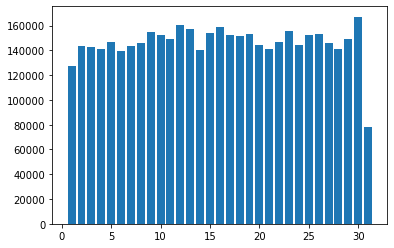

In [95]:
y = d7['Date/Time'].dt.day.value_counts().values
x = d7['Date/Time'].dt.day.value_counts().index
plt.bar(x,y)
plt.show

In [96]:
d7['Date/Time'].dt.day_name().value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: Date/Time, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

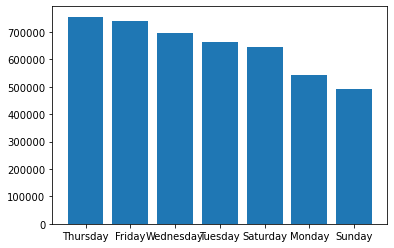

In [97]:
y = d7['Date/Time'].dt.day_name().value_counts().values
x = d7['Date/Time'].dt.day_name().value_counts().index
plt.bar(x,y)
plt.show

In [98]:
d7['Date'] = d7['Date/Time'].dt.date

In [99]:
d7['Time'] = d7['Date/Time'].dt.time

In [100]:
d7.drop(['Date/Time'], axis = 1)
d7

,Date/Time,Lat,Lon,Base,Date,Time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00
...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014-09-30,22:57:00
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014-09-30,22:57:00
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014-09-30,22:58:00
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014-09-30,22:58:00


In [101]:
d7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Date       object        
 5   Time       object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 207.6+ MB


d7.to_csv('Dataset.csv', index = False)

d8 = pd.concat([d1,d2,d3,d4,d5], axis = 0, ignore_index = True, sort = False)
d8['Date/Time'] = pd.to_datetime(d8['Date/Time'])
d8['Date'] = d8['Date/Time'].dt.date
d8['Time'] = d8['Date/Time'].dt.time
d8 = d8.drop(['Date/Time'], axis = 1)
d8.head()

d8 = d8.drop(['Date/Time'], axis = 1)
d8.head()

d8.to_csv('Data.csv', index = 0)

!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa

%load_ext sql

In [102]:
d7.head(10)

,Date/Time,Lat,Lon,Base,Date,Time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512,2014-04-01,00:33:00
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512,2014-04-01,00:39:00
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512,2014-04-01,00:45:00
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512,2014-04-01,00:55:00
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512,2014-04-01,01:01:00


In [103]:
d7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Date       object        
 5   Time       object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 207.6+ MB


In [104]:
d7['Date'] = pd.to_datetime(d7['Date'])


In [105]:
d7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Date       datetime64[ns]
 5   Time       object        
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 207.6+ MB


In [106]:
d7['Time'] = pd.to_datetime(d7['Time'], format='%H:%M:%S')

### plotting trips by days


In [107]:
a = d7.Date.dt.day_name()
b = d7.Date.dt.dayofweek
b

0          1
1          1
2          1
3          1
4          1
          ..
4534322    1
4534323    1
4534324    1
4534325    1
4534326    1
Name: Date, Length: 4534327, dtype: int64

In [108]:
z = {'index':b.values, 'day':a.values}
z

{'index': array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 'day': array(['Tuesday', 'Tuesday', 'Tuesday', ..., 'Tuesday', 'Tuesday',
        'Tuesday'], dtype=object)}

In [109]:
z = pd.DataFrame(data = z)
z.value_counts()

index  day      
3      Thursday     755145
4      Friday       741139
2      Wednesday    696488
1      Tuesday      663789
5      Saturday     646114
0      Monday       541472
6      Sunday       490180
dtype: int64

In [110]:
type(z.value_counts().index.values)

numpy.ndarray

In [111]:
z.value_counts().index.values

array([(3, 'Thursday'), (4, 'Friday'), (2, 'Wednesday'), (1, 'Tuesday'),
       (5, 'Saturday'), (0, 'Monday'), (6, 'Sunday')], dtype=object)

In [112]:
z['index'].value_counts().index

Int64Index([3, 4, 2, 1, 5, 0, 6], dtype='int64')

In [113]:
c = {'index':z['index'].value_counts().index,'day':z.day.value_counts().index,'count':z.value_counts().values}
e = pd.DataFrame(data = c, index= None)

In [114]:
e = e.sort_values(by =['index'])

<function matplotlib.pyplot.show(close=None, block=None)>

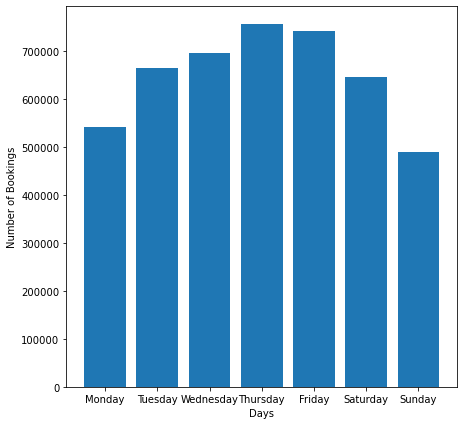

In [115]:
plt.figure(figsize = (7,7))
plt.bar(e['day'],e['count'])
plt.xlabel('Days')
plt.ylabel('Number of Bookings')
plt.show

### plotting trips per hour

<function matplotlib.pyplot.show(close=None, block=None)>

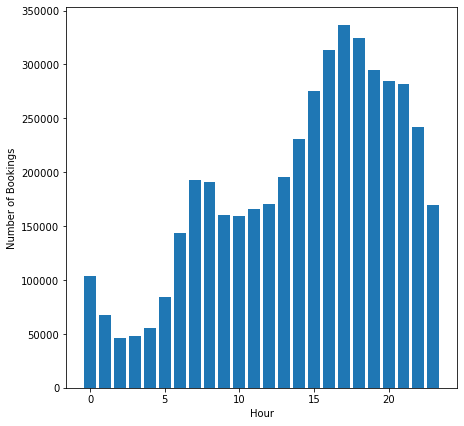

In [116]:
plt.figure(figsize = (7,7))
plt.bar(d7['Date/Time'].dt.hour.value_counts().index, d7['Date/Time'].dt.hour.value_counts().values)
plt.xlabel('Hour')
plt.ylabel('Number of Bookings')
plt.show

In [117]:
d7['month'] = d7.Date.dt.month_name()


In [118]:
d7.month.value_counts()

September    1028136
August        829275
July          796121
June          663844
May           652435
April         564516
Name: month, dtype: int64

In [119]:
gf = d7.groupby(['month',d7['Date/Time'].dt.hour]).size()
# a = np.array(gf.values)
# len(a)
gf.head(25)

month   Date/Time
April   0            11910
        1             7769
        2             4935
        3             5040
        4             6095
        5             9476
        6            18498
        7            24924
        8            22843
        9            17939
        10           17865
        11           18774
        12           19425
        13           22603
        14           27190
        15           35324
        16           42003
        17           45475
        18           43003
        19           38923
        20           36244
        21           36964
        22           30645
        23           20649
August  0            21451
dtype: int64

In [120]:
gf.index[0][0]

'April'

In [121]:
d7['Date/Time'].dt.hour.value_counts().values

array([336190, 324679, 313400, 294513, 284604, 281460, 275466, 241858,
       230625, 195877, 193094, 190504, 170452, 169190, 165703, 159967,
       159148, 143213, 103836,  83939,  67227,  55230,  48287,  45865],
      dtype=int64)

In [122]:
d7['Date/Time'].dt.hour.value_counts().index

Int64Index([17, 18, 16, 19, 20, 21, 15, 22, 14, 13,  7,  8, 12, 23, 11,  9, 10,
             6,  0,  5,  1,  4,  3,  2],
           dtype='int64')

In [177]:
type(gf.values)

numpy.ndarray

In [133]:
b[0][0]+b[1][0]+b[2][0]+b[3][0]+b[4][0]+b[5][0]

103836

In [134]:
b[0][17]+b[1][17]+b[2][17]+b[3][17]+b[4][17]+b[5][17]

336190

In [126]:
np.arange(0, 24)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [127]:
a = np.array(gf.values)
len(a)

144

In [128]:
a

array([11910,  7769,  4935,  5040,  6095,  9476, 18498, 24924, 22843,
       17939, 17865, 18774, 19425, 22603, 27190, 35324, 42003, 45475,
       43003, 38923, 36244, 36964, 30645, 20649, 21451, 14471, 10105,
       10376, 11774, 16525, 24907, 34064, 34566, 30195, 30706, 31778,
       32106, 35764, 40644, 48197, 53481, 57122, 55390, 53008, 51674,
       51354, 46008, 33609, 17953, 11527,  8562,  9199, 10040, 14932,
       23456, 32545, 33387, 28486, 28558, 30120, 30900, 35832, 41357,
       46053, 52403, 58260, 57268, 52332, 51859, 49528, 42218, 29346,
       14514,  9167,  6189,  6937,  7701, 11955, 22030, 30834, 29771,
       24298, 23584, 24155, 25233, 28937, 34428, 41586, 48162, 50452,
       45013, 38203, 40108, 40791, 35614, 24182, 13875,  8186,  5372,
        5946,  6945, 10789, 21015, 27413, 25460, 20507, 20801, 22055,
       23595, 27699, 34363, 43087, 49127, 51508, 48965, 42387, 40731,
       42217, 35556, 24836, 24133, 16107, 10702, 10789, 12675, 20262,
       33307, 43314,

In [129]:
d7['Date/Time'].dt.hour[0].dtype

dtype('int64')

In [130]:
d7

,Date/Time,Lat,Lon,Base,Date,Time,month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,1900-01-01 00:11:00,April
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,1900-01-01 00:17:00,April
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,1900-01-01 00:21:00,April
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,1900-01-01 00:28:00,April
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,1900-01-01 00:33:00,April
...,...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014-09-30,1900-01-01 22:57:00,September
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014-09-30,1900-01-01 22:57:00,September
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014-09-30,1900-01-01 22:58:00,September
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014-09-30,1900-01-01 22:58:00,September


In [131]:
d7.index

RangeIndex(start=0, stop=4534327, step=1)

In [132]:
b = a.reshape((6,24))
b

array([[11910,  7769,  4935,  5040,  6095,  9476, 18498, 24924, 22843,
        17939, 17865, 18774, 19425, 22603, 27190, 35324, 42003, 45475,
        43003, 38923, 36244, 36964, 30645, 20649],
       [21451, 14471, 10105, 10376, 11774, 16525, 24907, 34064, 34566,
        30195, 30706, 31778, 32106, 35764, 40644, 48197, 53481, 57122,
        55390, 53008, 51674, 51354, 46008, 33609],
       [17953, 11527,  8562,  9199, 10040, 14932, 23456, 32545, 33387,
        28486, 28558, 30120, 30900, 35832, 41357, 46053, 52403, 58260,
        57268, 52332, 51859, 49528, 42218, 29346],
       [14514,  9167,  6189,  6937,  7701, 11955, 22030, 30834, 29771,
        24298, 23584, 24155, 25233, 28937, 34428, 41586, 48162, 50452,
        45013, 38203, 40108, 40791, 35614, 24182],
       [13875,  8186,  5372,  5946,  6945, 10789, 21015, 27413, 25460,
        20507, 20801, 22055, 23595, 27699, 34363, 43087, 49127, 51508,
        48965, 42387, 40731, 42217, 35556, 24836],
       [24133, 16107, 10702, 10789,

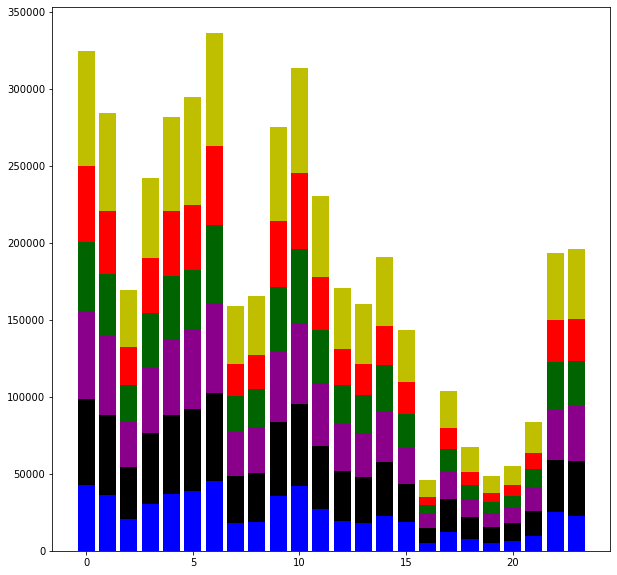

In [135]:
fig = plt.subplots(figsize = (10,10))
p1 = plt.bar(d7['Date/Time'].dt.hour.value_counts().index, b[0], color ='#0000FF')
p2 = plt.bar(d7['Date/Time'].dt.hour.value_counts().index, b[1], bottom = b[0] , color ='#000000')
p3 = plt.bar(d7['Date/Time'].dt.hour.value_counts().index, b[2], bottom = b[1]+b[0], color ='#8B008B')
p4 = plt.bar(d7['Date/Time'].dt.hour.value_counts().index, b[3], bottom = b[2]+b[1]+b[0], color ='#006400')
p5 = plt.bar(d7['Date/Time'].dt.hour.value_counts().index, b[4], bottom = b[3]+b[2]+b[1]+b[0], color ='r')
p6 = plt.bar(d7['Date/Time'].dt.hour.value_counts().index, b[5], bottom = b[4]+b[3]+b[2]+b[1]+b[0], color ='y')

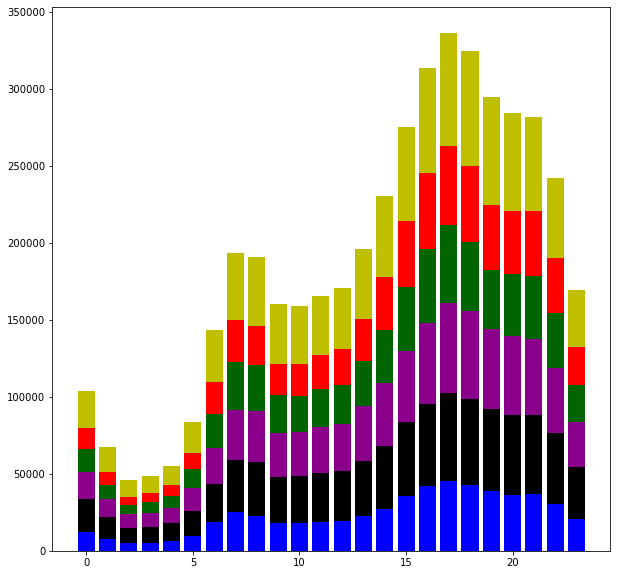

In [136]:
fig = plt.subplots(figsize = (10,10))
p1 = plt.bar(np.arange(0, 24), b[0], color ='#0000FF')
p2 = plt.bar(np.arange(0, 24), b[1], bottom = b[0] , color ='#000000')
p3 = plt.bar(np.arange(0, 24), b[2], bottom = b[1]+b[0], color ='#8B008B')
p4 = plt.bar(np.arange(0, 24), b[3], bottom = b[2]+b[1]+b[0], color ='#006400')
p5 = plt.bar(np.arange(0, 24), b[4], bottom = b[3]+b[2]+b[1]+b[0], color ='r')
p6 = plt.bar(np.arange(0, 24), b[5], bottom = b[4]+b[3]+b[2]+b[1]+b[0], color ='y')

No handles with labels found to put in legend.


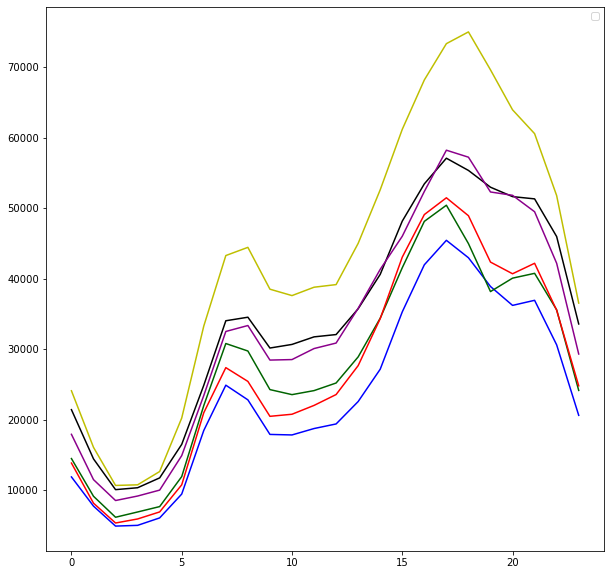

In [178]:
fig = plt.subplots(figsize = (10,10))
p1 = plt.plot(np.arange(0, 24), b[0], color ='#0000FF')
p2 = plt.plot(np.arange(0, 24), b[1], color ='#000000')
p3 = plt.plot(np.arange(0, 24), b[2], color ='#8B008B')
p4 = plt.plot(np.arange(0, 24), b[3], color ='#006400')
p5 = plt.plot(np.arange(0, 24), b[4], color ='r')
p6 = plt.plot(np.arange(0, 24), b[5], color ='y')
plt.legend()

### plotting trips per date

<function matplotlib.pyplot.show(close=None, block=None)>

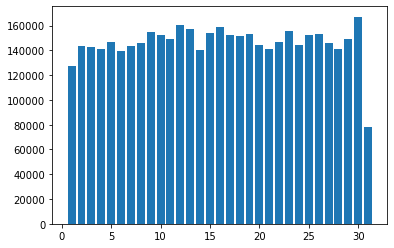

In [179]:
y = d7['Date/Time'].dt.day.value_counts().values
x = d7['Date/Time'].dt.day.value_counts().index
plt.bar(x,y)
plt.show

In [180]:
d7['day'] = d7['Date/Time'].dt.day_name()
d7['day']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
4534322    Tuesday
4534323    Tuesday
4534324    Tuesday
4534325    Tuesday
4534326    Tuesday
Name: day, Length: 4534327, dtype: object

In [181]:
d7['day'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: day, dtype: int64

In [182]:
gf = d7.groupby(['month',d7['Date/Time'].dt.dayofweek]).size()
gf

month      Date/Time
April      0             60861
           1             91185
           2            108631
           3             85067
           4             90303
           5             77218
           6             51251
August     0             91633
           1            107124
           2            115256
           3            124117
           4            148674
           5            132225
           6            110246
July       0             93189
           1            137454
           2            147717
           3            148439
           4            102735
           5             90260
           6             76327
June       0             94655
           1             88134
           2             99654
           3            115325
           4            105056
           5             81364
           6             79656
May        0             63846
           1             76662
           2             89857
           3      

In [183]:
e = gf.values
len(e)

42

In [184]:
f = e.reshape((6,7))
f

array([[ 60861,  91185, 108631,  85067,  90303,  77218,  51251],
       [ 91633, 107124, 115256, 124117, 148674, 132225, 110246],
       [ 93189, 137454, 147717, 148439, 102735,  90260,  76327],
       [ 94655,  88134,  99654, 115325, 105056,  81364,  79656],
       [ 63846,  76662,  89857, 128921, 133991, 102990,  56168],
       [137288, 163230, 135373, 153276, 160380, 162057, 116532]],
      dtype=int64)

In [185]:
f[5]

array([137288, 163230, 135373, 153276, 160380, 162057, 116532],
      dtype=int64)

In [186]:
g = ['Sunday','Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday']
g

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday']

<BarContainer object of 7 artists>

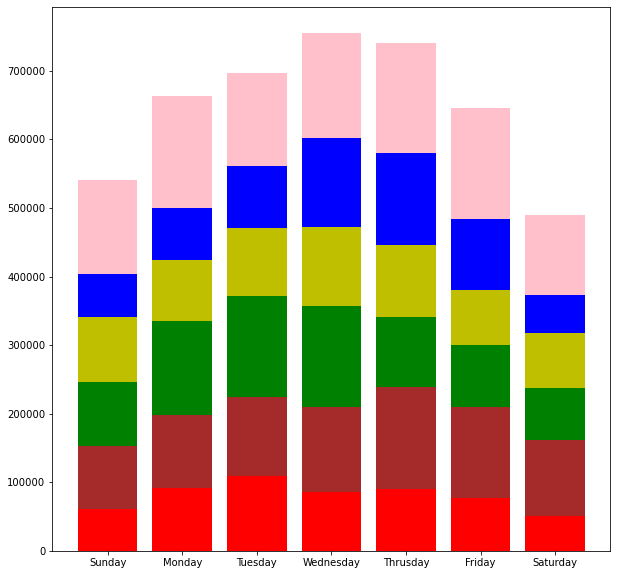

In [187]:
plt.subplots(figsize = (10,10))
plt.bar(g,f[0], color= 'r')
plt.bar(g,f[1],bottom = f[0], color= 'brown')
plt.bar(g,f[2],bottom = f[0]+f[1], color= 'green')
plt.bar(g,f[3],bottom = f[0]+f[1]+f[2], color= 'y')
plt.bar(g,f[4],bottom = f[0]+f[1]+f[2]+f[3], color= 'blue')
plt.bar(g,f[5],bottom = f[0]+f[1]+f[2]+f[3]+f[4], color= 'pink')

<BarContainer object of 7 artists>

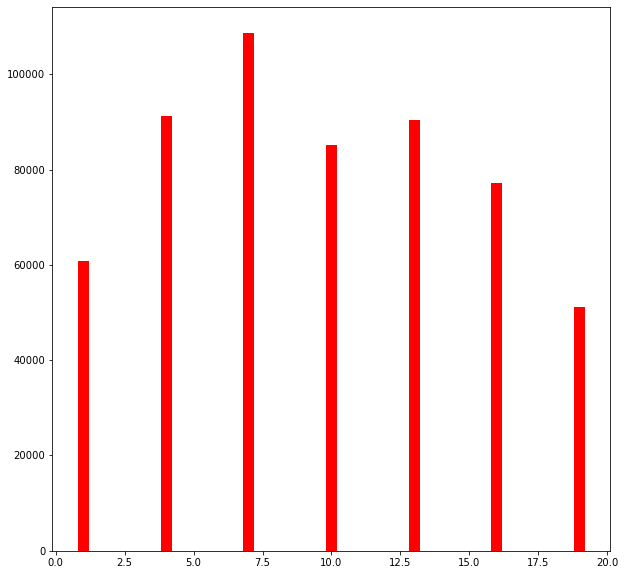

In [188]:
x= np.arange(1,22,3)
x
plt.subplots(figsize = (10,10))
plt.bar(x,f[0],width = 0.4, color= 'r')
# plt.bar(x-0.8,f[1],width = 0.4, color= 'brown')
# plt.bar(x-0.4,f[2],width = 0.4, color= 'green')
# plt.bar(x+0.4,f[3],width = 0.4, color= 'yellow')
# plt.bar(x+0.8,f[4],width = 0.4, color= 'blue')
# plt.bar(x+1.2,f[5],width = 0.4, color= 'pink')

In [189]:
len(e)

42

In [207]:
dd

Date/Time  Date
0          4        60861
           5        63846
           6        94655
           7        93189
           8        91633
           9       137288
1          4        91185
           5        76662
           6        88134
           7       137454
           8       107124
           9       163230
2          4       108631
           5        89857
           6        99654
           7       147717
           8       115256
           9       135373
3          4        85067
           5       128921
           6       115325
           7       148439
           8       124117
           9       153276
4          4        90303
           5       133991
           6       105056
           7       102735
           8       148674
           9       160380
5          4        77218
           5       102990
           6        81364
           7        90260
           8       132225
           9       162057
6          4        51251
           5        56

In [206]:
dd = d7.groupby([d7['Date/Time'].dt.dayofweek,d7.Date.dt.month]).size()
h = dd.values.reshape((7,6))
h

array([[ 60861,  63846,  94655,  93189,  91633, 137288],
       [ 91185,  76662,  88134, 137454, 107124, 163230],
       [108631,  89857,  99654, 147717, 115256, 135373],
       [ 85067, 128921, 115325, 148439, 124117, 153276],
       [ 90303, 133991, 105056, 102735, 148674, 160380],
       [ 77218, 102990,  81364,  90260, 132225, 162057],
       [ 51251,  56168,  79656,  76327, 110246, 116532]], dtype=int64)

In [ ]:
h[0][1]+h[1][1]+h[2][1]+h[3][1]+h[4][1]+h[5][1]+h[6][1]


In [208]:
d7.month.value_counts()

September    1028136
August        829275
July          796121
June          663844
May           652435
April         564516
Name: month, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

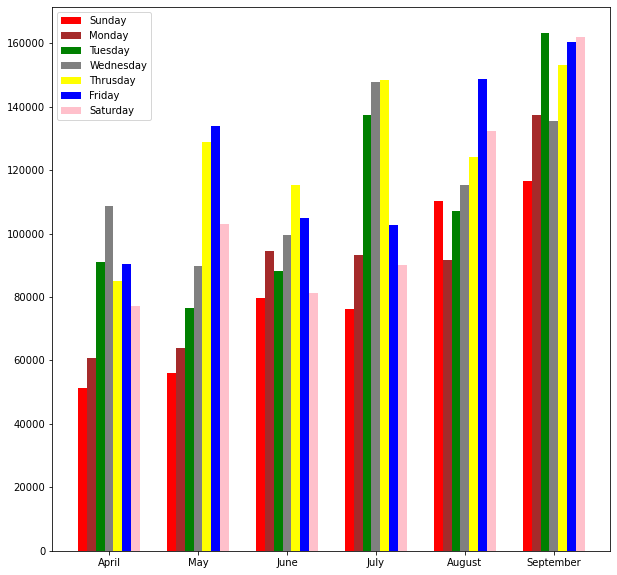

In [209]:
x= np.arange(1,24,4)
plt.subplots(figsize = (10,10))
plt.bar(x-1.2,h[6],width = 0.4, color= 'r')
plt.bar(x-0.8,h[0],width = 0.4, color= 'brown')
plt.bar(x-0.4,h[1],width = 0.4, color= 'green')
plt.bar(x,h[2],width = 0.4, color= 'grey')
plt.bar(x+0.4,h[3],width = 0.4, color= 'yellow')
plt.bar(x+0.8,h[4],width = 0.4, color= 'blue')
plt.bar(x+1.2,h[5],width = 0.4, color= 'pink')
plt.xticks(x,['April','May','June','July','August','September'])
plt.legend(g)
plt.show

In [192]:
d7.head()

,Date/Time,Lat,Lon,Base,Date,Time,month,day,geometry
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,1900-01-01 00:11:00,April,Tuesday,POINT (-73.95490 40.76900)
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,1900-01-01 00:17:00,April,Tuesday,POINT (-74.03450 40.72670)
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,1900-01-01 00:21:00,April,Tuesday,POINT (-73.98730 40.73160)
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,1900-01-01 00:28:00,April,Tuesday,POINT (-73.97760 40.75880)
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,1900-01-01 00:33:00,April,Tuesday,POINT (-73.97220 40.75940)


In [193]:
d7.groupby('Base').size()

Base
B02512     205673
B02598    1393113
B02617    1458853
B02682    1212789
B02764     263899
dtype: int64

<BarContainer object of 5 artists>

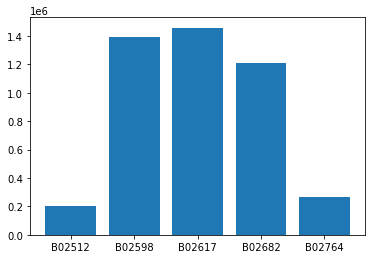

In [194]:
plt.bar(d7.groupby('Base').size().index,d7.groupby('Base').size().values)

In [195]:
d7.groupby([d7.Date.dt.month,'Base']).size()

Date  Base  
4     B02512     35536
      B02598    183263
      B02617    108001
      B02682    227808
      B02764      9908
5     B02512     36765
      B02598    260549
      B02617    122734
      B02682    222883
      B02764      9504
6     B02512     32509
      B02598    242975
      B02617    184460
      B02682    194926
      B02764      8974
7     B02512     35021
      B02598    245597
      B02617    310160
      B02682    196754
      B02764      8589
8     B02512     31472
      B02598    220129
      B02617    355803
      B02682    173280
      B02764     48591
9     B02512     34370
      B02598    240600
      B02617    377695
      B02682    197138
      B02764    178333
dtype: int64

In [196]:
m = d7.groupby([d7.Date.dt.month,'Base']).size().values.reshape((6,5))
m

array([[ 35536, 183263, 108001, 227808,   9908],
       [ 36765, 260549, 122734, 222883,   9504],
       [ 32509, 242975, 184460, 194926,   8974],
       [ 35021, 245597, 310160, 196754,   8589],
       [ 31472, 220129, 355803, 173280,  48591],
       [ 34370, 240600, 377695, 197138, 178333]], dtype=int64)

In [197]:
aa = d7.groupby(['Base']).size().index
aa

Index(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype='object', name='Base')

<function matplotlib.pyplot.show(close=None, block=None)>

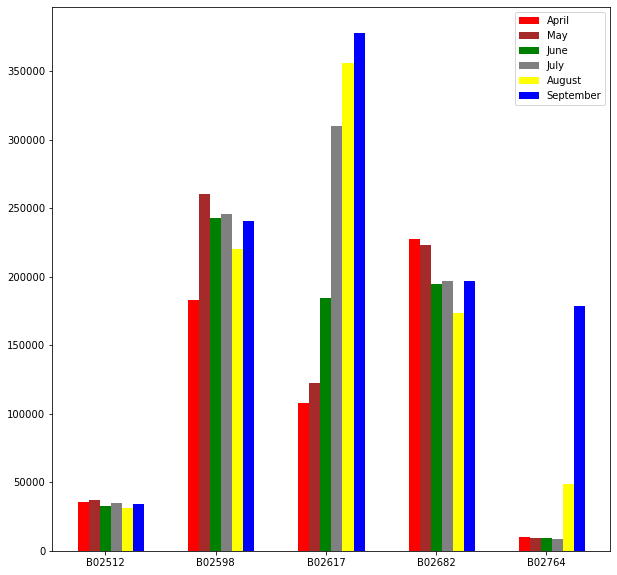

In [198]:
xx= np.arange(1,20,4)
xx
plt.subplots(figsize = (10,10))
plt.bar(xx-0.8,m[0],width = 0.4, color= 'red')
plt.bar(xx-0.4,m[1],width = 0.4, color= 'brown')
plt.bar(xx,m[2],width = 0.4, color= 'green')
plt.bar(xx+0.4,m[3],width = 0.4, color= 'grey')
plt.bar(xx+0.8,m[4],width = 0.4, color= 'yellow')
plt.bar(xx+1.2,m[5],width = 0.4, color= 'blue')
plt.xticks(xx,['B02512', 'B02598', 'B02617', 'B02682', 'B02764'])
plt.legend(['April','May','June','July','August','September'])
plt.show

In [199]:
d7.groupby([d7['Date/Time'].dt.hour,d7['Date/Time'].dt.day]).size()

Date/Time  Date/Time
0          1            3247
           2            2480
           3            3415
           4            2944
           5            2786
                        ... 
23         27           6176
           28           4556
           29           4410
           30           4796
           31           4026
Length: 744, dtype: int64

In [200]:
gg = d7.groupby([d7['Date/Time'].dt.hour,d7['Date/Time'].dt.day]).size().values.reshape((24,31))
gg

array([[ 3247,  2480,  3415,  2944,  2786,  4623,  3715,  2882,  2708,
         3351,  3093,  3276,  5517,  3810,  2543,  2595,  3208,  3447,
         3277,  4567,  4381,  2852,  2605,  3277,  2442,  3887,  5304,
         4224,  2732,  2439,  2209],
       [ 1982,  1600,  2176,  1718,  1567,  2932,  2326,  1672,  1757,
         2167,  1699,  2187,  3594,  2399,  1557,  1622,  2084,  2178,
         2235,  3263,  3265,  1662,  1608,  2090,  1525,  3123,  3712,
         2711,  1862,  1547,  1407],
       [ 1284,  1109,  1434,  1217,  1047,  1902,  1533,  1147,  1246,
         1495,  1126,  1419,  2312,  1637,  1115,  1142,  1532,  1364,
         1637,  2134,  2013,  1207,  1163,  1480,  1098,  2087,  2407,
         1894,  1442,  1135,  1107],
       [ 1331,  1442,  1489,  1449,  1278,  1599,  1622,  1509,  1501,
         1466,  1450,  1386,  1865,  1689,  1416,  1429,  1517,  1657,
         1710,  1889,  1761,  1503,  1465,  1520,  1472,  1840,  2098,
         1846,  1717,  1436,   935],


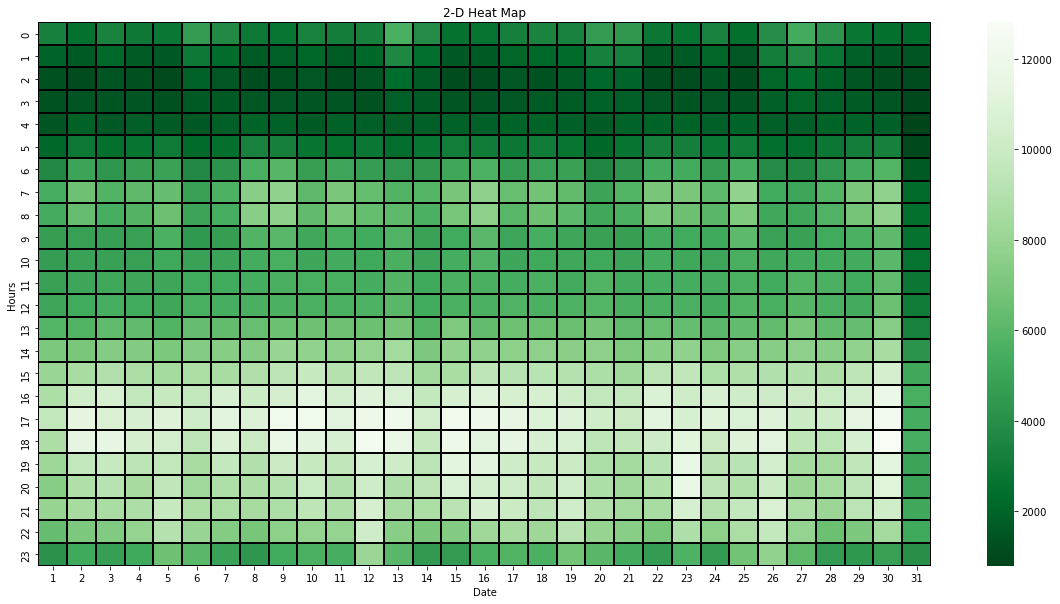

In [201]:
axx = plt.subplots(figsize = (20,10))
ax = sns.heatmap(gg , linewidth = 0.01,linecolor = 'black' , cmap = 'Greens_r')
ax.set_xticklabels(np.arange(1,32))
ax.set_xlabel('Date')
ax.set_ylabel('Hours')
plt.title( "2-D Heat Map" )
plt.show()

In [202]:
md = d7.groupby([d7['Date/Time'].dt.month,d7['Date/Time'].dt.day]).size().values
md

array([14546, 17474, 20701, 26714, 19521, 13445, 19550, 16188, 16843,
       20041, 20420, 18170, 12112, 12674, 20641, 17717, 20973, 18074,
       14602, 11017, 13162, 16975, 20346, 23352, 25095, 24925, 14677,
       15475, 22835, 36251, 23375, 24235, 22234, 13918, 17859, 19300,
       21891, 27513, 26385, 22550, 14901, 17470, 19498, 22218, 26301,
       32493, 22294, 16508, 18315, 20860, 23508, 26802, 26465, 14651,
       10841, 10202, 17004, 22240, 24930, 24413, 21261, 15967, 17503,
       22674, 22831, 28371, 24683, 20889, 15749, 23244, 22874, 25716,
       29844, 31207, 19327, 14511, 17778, 21807, 24647, 28594, 24271,
       19940, 16322, 17735, 20779, 26460, 28516, 24895, 21208, 17107,
       18395, 21228, 26480, 21597, 14148, 10890, 11443, 18280, 25763,
       27817, 30541, 28752, 25936, 21082, 27350, 33845, 28607, 30710,
       29860, 25726, 21212, 23578, 29029, 34073, 32050, 29975, 27708,
       22590, 23981, 27589, 30740, 33541, 32353, 28678, 23146, 24952,
       28094, 30495,

In [203]:
days = [30,31,30,31,31,30]
mdd = list()
num_days_passed = 0
for day in days:
    mdd.append(md[num_days_passed:num_days_passed+day])
    num_days_passed += day
    

In [204]:
mdd

[array([14546, 17474, 20701, 26714, 19521, 13445, 19550, 16188, 16843,
        20041, 20420, 18170, 12112, 12674, 20641, 17717, 20973, 18074,
        14602, 11017, 13162, 16975, 20346, 23352, 25095, 24925, 14677,
        15475, 22835, 36251], dtype=int64),
 array([23375, 24235, 22234, 13918, 17859, 19300, 21891, 27513, 26385,
        22550, 14901, 17470, 19498, 22218, 26301, 32493, 22294, 16508,
        18315, 20860, 23508, 26802, 26465, 14651, 10841, 10202, 17004,
        22240, 24930, 24413, 21261], dtype=int64),
 array([15967, 17503, 22674, 22831, 28371, 24683, 20889, 15749, 23244,
        22874, 25716, 29844, 31207, 19327, 14511, 17778, 21807, 24647,
        28594, 24271, 19940, 16322, 17735, 20779, 26460, 28516, 24895,
        21208, 17107, 18395], dtype=int64),
 array([21228, 26480, 21597, 14148, 10890, 11443, 18280, 25763, 27817,
        30541, 28752, 25936, 21082, 27350, 33845, 28607, 30710, 29860,
        25726, 21212, 23578, 29029, 34073, 32050, 29975, 27708, 22590,
        2

In [205]:
ggg = mdd 
ggg = np.concatenate((ggg[0],[0]), axis = 0)
ggg

array([14546, 17474, 20701, 26714, 19521, 13445, 19550, 16188, 16843,
       20041, 20420, 18170, 12112, 12674, 20641, 17717, 20973, 18074,
       14602, 11017, 13162, 16975, 20346, 23352, 25095, 24925, 14677,
       15475, 22835, 36251,     0], dtype=int64)

In [160]:
mddd = []
i =0
for day in days:
    if (day < 31):
        mddd.append(np.concatenate((mdd[i],[0]), axis = 0))
        i = i+1
    else:
        mddd.append(mdd[i])
        i = i+1    
mddd     

[array([14546, 17474, 20701, 26714, 19521, 13445, 19550, 16188, 16843,
        20041, 20420, 18170, 12112, 12674, 20641, 17717, 20973, 18074,
        14602, 11017, 13162, 16975, 20346, 23352, 25095, 24925, 14677,
        15475, 22835, 36251,     0], dtype=int64),
 array([23375, 24235, 22234, 13918, 17859, 19300, 21891, 27513, 26385,
        22550, 14901, 17470, 19498, 22218, 26301, 32493, 22294, 16508,
        18315, 20860, 23508, 26802, 26465, 14651, 10841, 10202, 17004,
        22240, 24930, 24413, 21261], dtype=int64),
 array([15967, 17503, 22674, 22831, 28371, 24683, 20889, 15749, 23244,
        22874, 25716, 29844, 31207, 19327, 14511, 17778, 21807, 24647,
        28594, 24271, 19940, 16322, 17735, 20779, 26460, 28516, 24895,
        21208, 17107, 18395,     0], dtype=int64),
 array([21228, 26480, 21597, 14148, 10890, 11443, 18280, 25763, 27817,
        30541, 28752, 25936, 21082, 27350, 33845, 28607, 30710, 29860,
        25726, 21212, 23578, 29029, 34073, 32050, 29975, 27708, 22

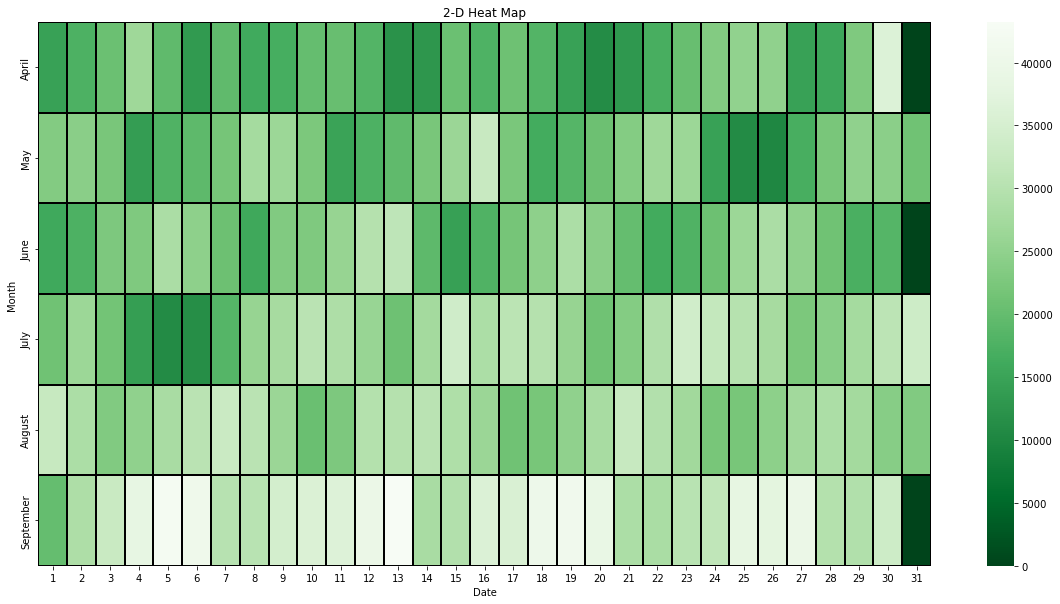

In [161]:
axxxx = plt.subplots(figsize = (20,10))
axxx = sns.heatmap(mddd , linewidth = 0.01,linecolor = 'black' , cmap = 'Greens_r')
axxx.set_xticklabels(np.arange(1,32))
axxx.set_yticklabels(['April','May','June','July','August','September'])
axxx.set_xlabel('Date')
axxx.set_ylabel('Month')
plt.title( "2-D Heat Map" )
plt.show()

In [162]:
d7.groupby([d7['Date/Time'].dt.month,d7['Date/Time'].dt.dayofweek]).size()

Date/Time  Date/Time
4          0             60861
           1             91185
           2            108631
           3             85067
           4             90303
           5             77218
           6             51251
5          0             63846
           1             76662
           2             89857
           3            128921
           4            133991
           5            102990
           6             56168
6          0             94655
           1             88134
           2             99654
           3            115325
           4            105056
           5             81364
           6             79656
7          0             93189
           1            137454
           2            147717
           3            148439
           4            102735
           5             90260
           6             76327
8          0             91633
           1            107124
           2            115256
           3      

In [163]:
mdow = d7.groupby([d7['Date/Time'].dt.month,d7['Date/Time'].dt.dayofweek]).size().values.reshape((6,7))
mdow

array([[ 60861,  91185, 108631,  85067,  90303,  77218,  51251],
       [ 63846,  76662,  89857, 128921, 133991, 102990,  56168],
       [ 94655,  88134,  99654, 115325, 105056,  81364,  79656],
       [ 93189, 137454, 147717, 148439, 102735,  90260,  76327],
       [ 91633, 107124, 115256, 124117, 148674, 132225, 110246],
       [137288, 163230, 135373, 153276, 160380, 162057, 116532]],
      dtype=int64)

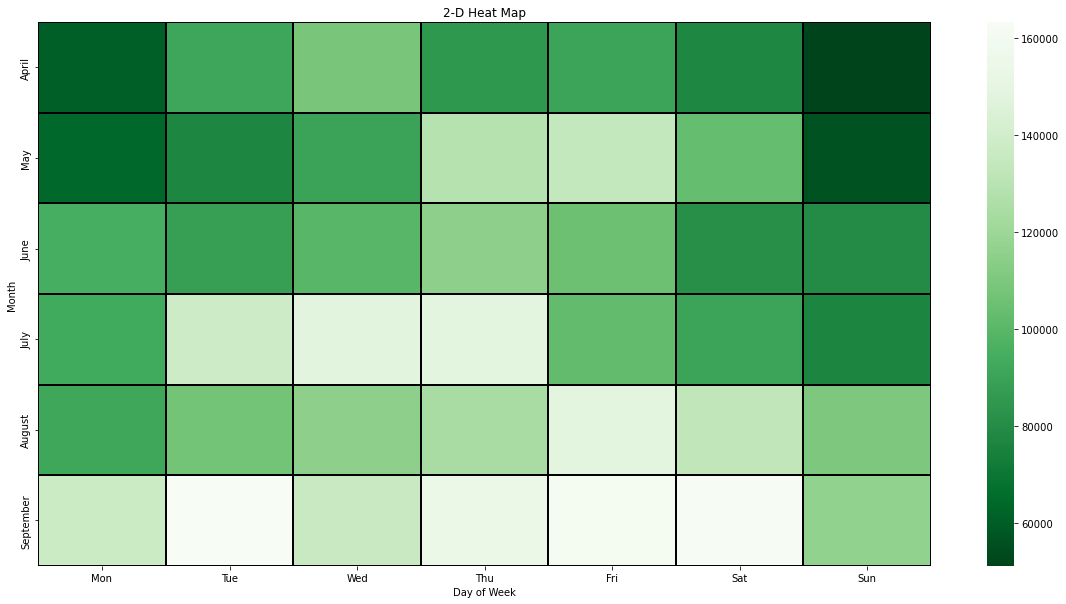

In [164]:
ap = plt.subplots(figsize = (20,10))
app = sns.heatmap(mdow , linewidth = 0.01,linecolor = 'black' , cmap = 'Greens_r')
app.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
app.set_yticklabels(['April','May','June','July','August','September'])
app.set_xlabel('Day of Week')
app.set_ylabel('Month')
plt.title( "2-D Heat Map" )
plt.show()

In [165]:
d7.groupby([d7['Date/Time'].dt.month,d7.Base]).size()

Date/Time  Base  
4          B02512     35536
           B02598    183263
           B02617    108001
           B02682    227808
           B02764      9908
5          B02512     36765
           B02598    260549
           B02617    122734
           B02682    222883
           B02764      9504
6          B02512     32509
           B02598    242975
           B02617    184460
           B02682    194926
           B02764      8974
7          B02512     35021
           B02598    245597
           B02617    310160
           B02682    196754
           B02764      8589
8          B02512     31472
           B02598    220129
           B02617    355803
           B02682    173280
           B02764     48591
9          B02512     34370
           B02598    240600
           B02617    377695
           B02682    197138
           B02764    178333
dtype: int64

In [166]:
mb = d7.groupby([d7['Date/Time'].dt.month,d7.Base]).size().values.reshape((6,5))
mb

array([[ 35536, 183263, 108001, 227808,   9908],
       [ 36765, 260549, 122734, 222883,   9504],
       [ 32509, 242975, 184460, 194926,   8974],
       [ 35021, 245597, 310160, 196754,   8589],
       [ 31472, 220129, 355803, 173280,  48591],
       [ 34370, 240600, 377695, 197138, 178333]], dtype=int64)

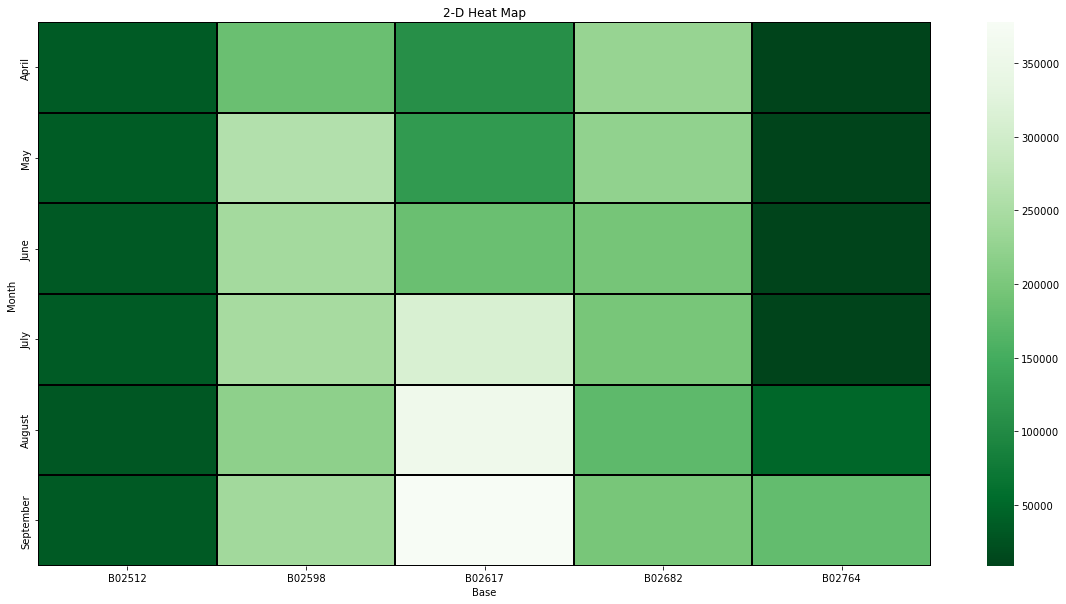

In [167]:
aq = plt.subplots(figsize = (20,10))
aqq = sns.heatmap(mb , linewidth = 0.01,linecolor = 'black' , cmap = 'Greens_r')
aqq.set_xticklabels(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'])
aqq.set_yticklabels(['April','May','June','July','August','September'])
aqq.set_xlabel('Base')
aqq.set_ylabel('Month')
plt.title( "2-D Heat Map" )
plt.show()

In [168]:
bdw = d7.groupby([d7['Date/Time'].dt.dayofweek,d7.Base]).size().values.reshape((7,5))
bdw

array([[ 25460, 163542, 176416, 143372,  32682],
       [ 31670, 202378, 214167, 176198,  39376],
       [ 32929, 216644, 222669, 189863,  34383],
       [ 35032, 235157, 240216, 205091,  39649],
       [ 33319, 229908, 234379, 201594,  41939],
       [ 26773, 198832, 206554, 170160,  43795],
       [ 20490, 146652, 164452, 126511,  32075]], dtype=int64)

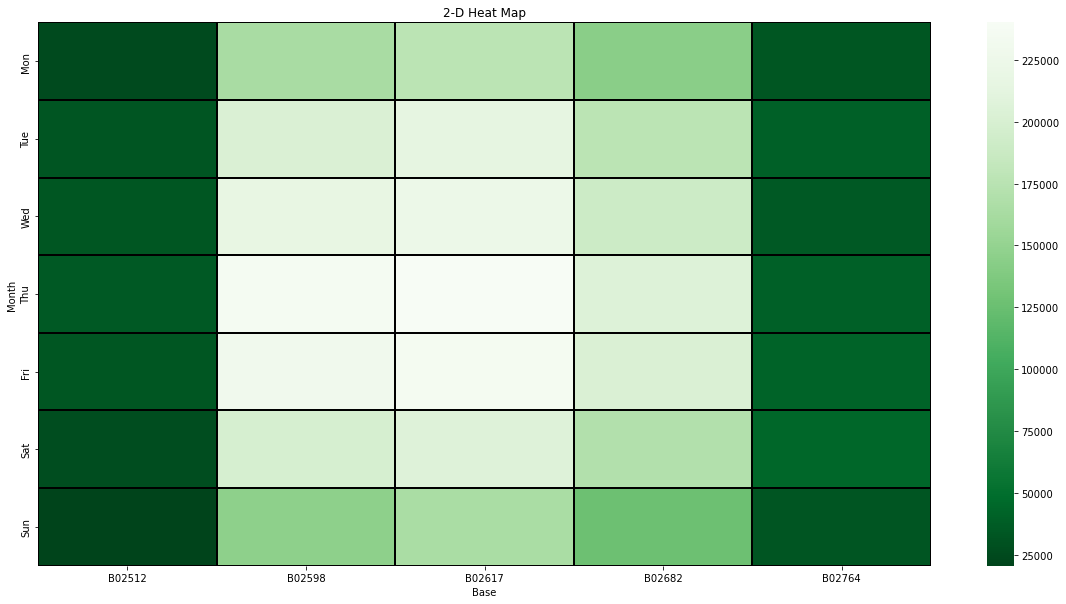

In [169]:
ar = plt.subplots(figsize = (20,10))
arr = sns.heatmap(bdw , linewidth = 0.01,linecolor = 'black' , cmap = 'Greens_r')
arr.set_xticklabels(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'])
arr.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
arr.set_xlabel('Base')
arr.set_ylabel('Month')
plt.title( "2-D Heat Map" )
plt.show()

In [170]:
!pip install geopandas

In [171]:
import geopandas as gpd

     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


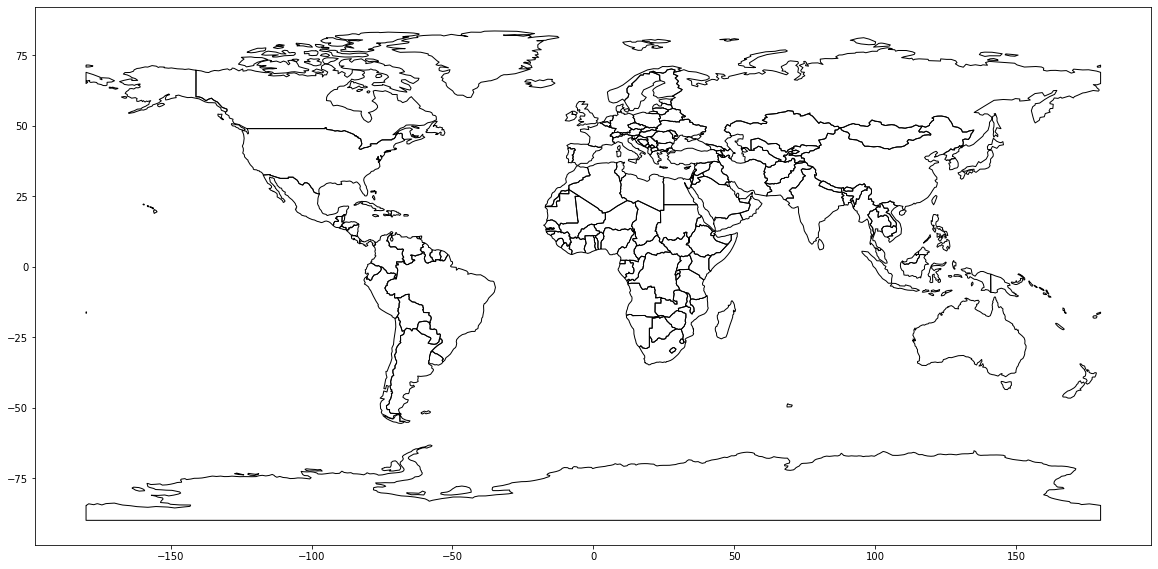

In [172]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world.head())
ax = world.plot(figsize = (20,40), color='none', edgecolor='black')

In [173]:
d7.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Date', 'Time', 'month', 'day'], dtype='object')

In [174]:
gdf = gpd.GeoDataFrame(d7, geometry = gpd.points_from_xy(d7.Lon,d7.Lat))
gdf.head()

,Date/Time,Lat,Lon,Base,Date,Time,month,day,geometry
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,1900-01-01 00:11:00,April,Tuesday,POINT (-73.95490 40.76900)
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,1900-01-01 00:17:00,April,Tuesday,POINT (-74.03450 40.72670)
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,1900-01-01 00:21:00,April,Tuesday,POINT (-73.98730 40.73160)
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,1900-01-01 00:28:00,April,Tuesday,POINT (-73.97760 40.75880)
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,1900-01-01 00:33:00,April,Tuesday,POINT (-73.97220 40.75940)


   boro_code      boro_name    shape_area     shape_leng  \
0        5.0  Staten Island  1.623677e+09  326060.058079   
1        2.0          Bronx  1.187231e+09  464720.015850   
2        3.0       Brooklyn  1.934095e+09  729595.348997   
3        4.0         Queens  3.042318e+09  903938.441308   
4        1.0      Manhattan  6.366055e+08  359935.015632   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...  
4  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  


<AxesSubplot:>

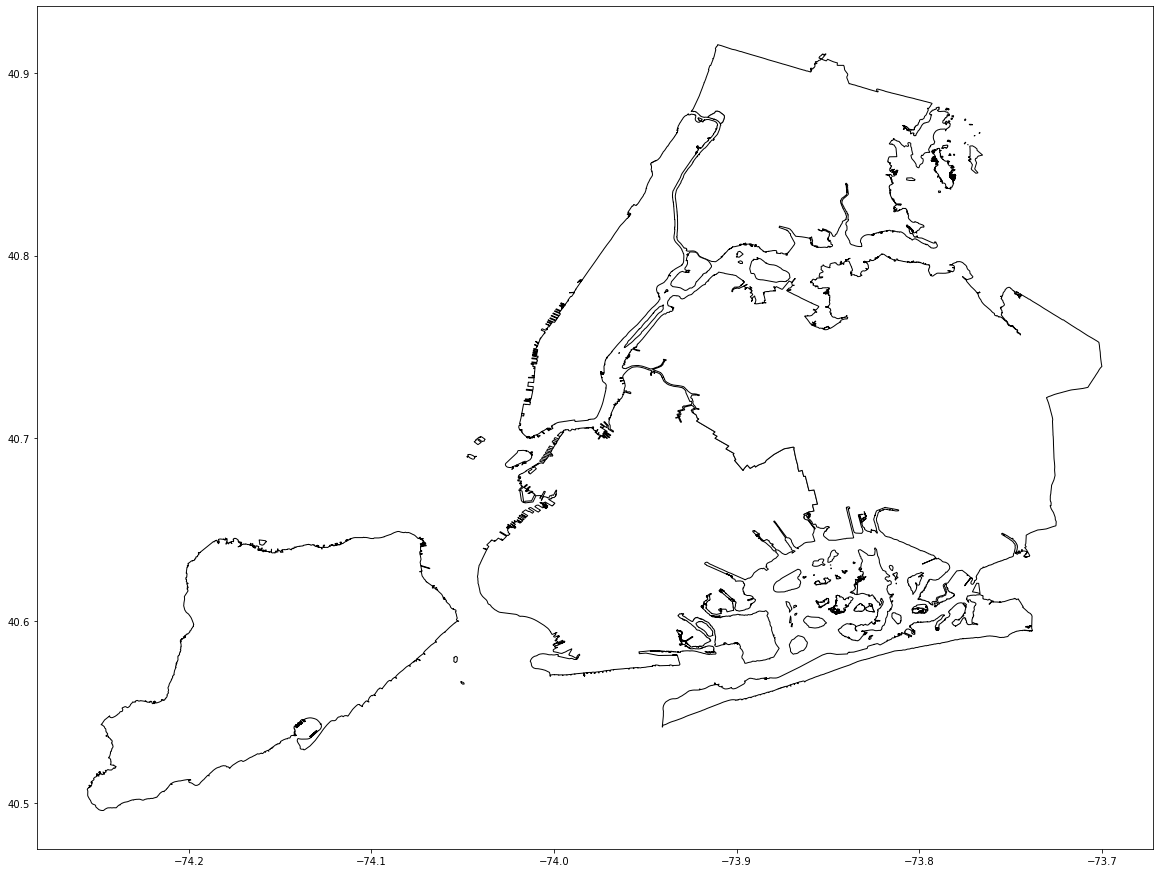

In [175]:
map_nyc = gpd.read_file('geo_export_ae20f333-8587-4eec-9b09-9adadbac5847.shp')
print(map_nyc.head())
map_nyc.plot(figsize = (20,20), color = 'white', edgecolor = 'black')

KeyboardInterrupt: 

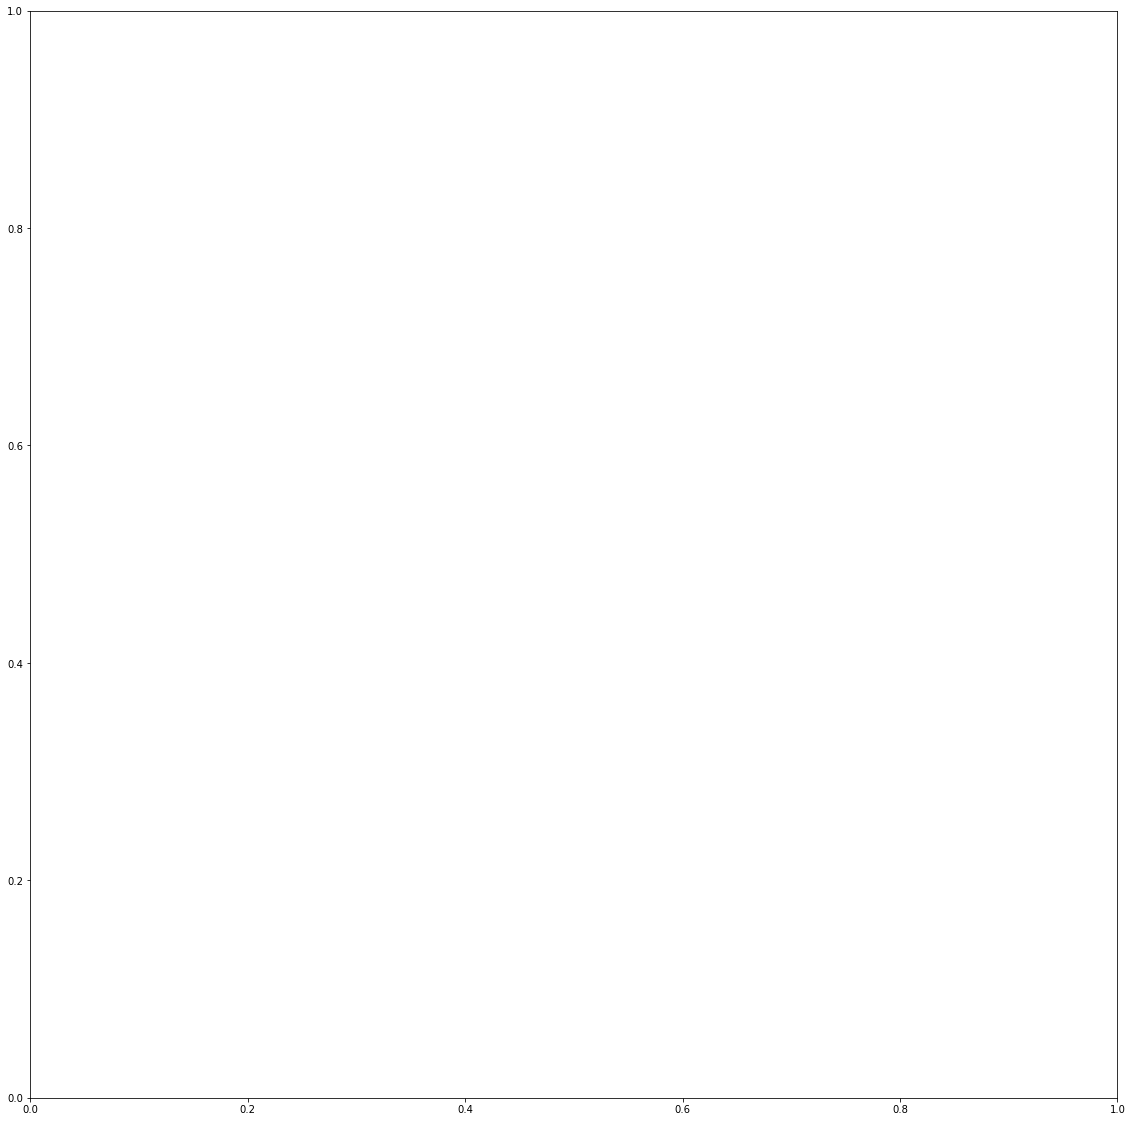

In [176]:
ax = gdf.plot(figsize = (20,20), color = 'red', markersize = 0.5 )
map_nyc.plot(color = 'none',edgecolor = 'black', ax = ax)